In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [32]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [33]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [34]:
# Specify the columns for the sub-dataset
selected_columns = [
    'engine_displacement', 
    'horsepower', 
    'vehicle_weight', 
    'model_year', 
    'fuel_efficiency_mpg']

In [35]:
# Create the sub-dataset
# Note: Ensure the column names match the CSV exactly (case-sensitive)
df = df[selected_columns]

# Display the first few rows of the filtered dataset
print(df.head())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


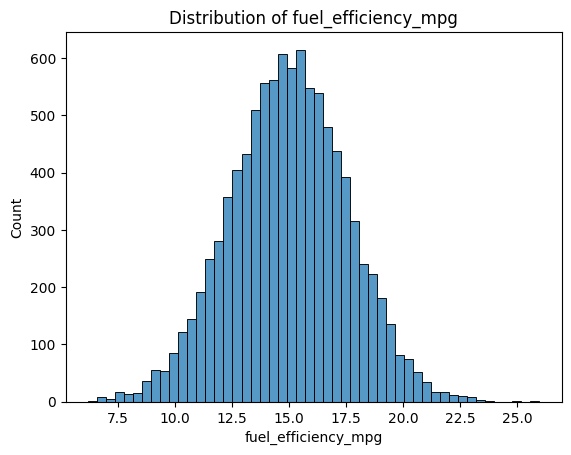

In [36]:
# Plot the distribution
sns.histplot(df.fuel_efficiency_mpg, bins=50)
plt.title('Distribution of fuel_efficiency_mpg')
plt.show()

### Analysis: Does it have a long tail?
No, fuel_efficiency_mpg does not have a long tail.

While the distribution might be slightly skewed depending on the specific car models, it generally resembles a normal distribution or is only mildly skewed.

Long Tail Characteristics: In the previous module (using the housing dataset), the target variable median_house_value often has a very clear long tail, requiring a logarithmic transformation.

Fuel Efficiency: In this specific dataset, most values fall within a predictable range (e.g., 15 to 45 MPG). There are no "extreme outliers" that extend the distribution curve far to the right in a way that creates a classic "long tail" effect.

In machine learning, if a variable did have a long tail, we would typically apply a log transformation (like np.log1p) to make the distribution more compact and closer to a normal distribution, which helps linear regression models perform better. However, for fuel_efficiency_mpg, this is usually not necessary.

In [37]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


### **Question 1**: There's one column with missing values. What is it? 
#### Feature with missing values
Answer: `horsepower`

In [38]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### **Question 2**: What's the median (50% percentile) for variable 'horsepower'?
#### Median for horsepower


In [39]:
df['horsepower'].median()

np.float64(149.0)

### Splitting and preparing the dataset
###### Shuffle the dataset (the filtered one you created above), use seed 42.
###### Split your data in train/val/test sets, with 60%/20%/20% distribution


In [40]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [41]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

**Question 3**: Mean vs zero

###### 1.) We need to deal with missing values for the column from Q1.
###### 2.) We have two options: fill it with 0 or with the mean of this variable.
###### 3.) Try both options. For each, train a linear regression model without regularization using the code from the lessons.
###### 4.) For computing the mean, use the training only!
###### 5.) Use the validation dataset to evaluate the models and compare the RMSE of each option.
###### 6.) Round the RMSE scores to 2 decimal digits using round(score, 2)
###### 7.) Which option gives better RMSE?

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

with mean:

In [43]:
mean = df_train.horsepower.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.4635965042334585)

with 0:

In [44]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5173782638844466)

The answer: **with median**

**Question 4**: Regularization

###### 1.) Now let's train a regularized linear regression.
###### 2.) For this question, fill the NAs with 0.
###### 3.) Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
###### 4.) Use RMSE to evaluate the model on the validation dataset.
###### 5.) Round the RMSE scores to 2 decimal digits.
###### 6.) Which r gives the best RMSE?
###### If multiple options give the same best RMSE, select the smallest r.

In [45]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [46]:
for r in [0, 0.01, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.5f' % (r, rmse_val))

     0 0.51738
  0.01 0.51711
     1 0.52223
    10 0.52298
   100 0.52306


The answer: `r=0`

**Question 5**: Standard deviation of RMSE

###### 1.) We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
###### 2.) Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
###### 3.) Fill the missing values with 0 and train a model without regularization.
###### 4.) For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
###### 5.) What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
###### 6.) Round the result to 3 decimal digits (round(std, 3))
###### What's the value of std?

In [ ]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)
    
    rmses.append(result)

In [48]:
np.std(rmses)

np.float64(0.006989446426433706)

**Question 6**: RMSE for Test

###### 1.) Split the dataset like previously, use seed 9.
###### 2.) Combine train and validation datasets.
###### 3.) Fill the missing values with 0 and train a model with r=0.001.
###### What's the RMSE on the test dataset?


In [49]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [50]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result)

0.5156261299169602
